In [ ]:
#Cell For Calling All Functions 

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# __________________________________________

# Taking PCA on Whole Data Set
# (Including Binaries):
# __________________________________________

## Data Cell:

In [74]:
# Load the Excel file into a DataFrame
#this includes binary data

data = pd.read_excel("CHD Data Set Excel.xlsx")

#Thought it would be helpful to viualize data format on here:

#     Age       Sex      ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  *CONTINOUS BELOW....*
#0     40        1            2           140          289          0           1   
#1     49        0            3           160          180          0           1   
#2     37        1            2           130          283          0           2   
#3     48        0            4           138          214          0           1   
#4     54        1            3           150          195          0           1   
#..   ...       ...           ...         ...          ...        ...         ...   
#913   45        1            1           110          264          0           1   
#914   68        1            4           144          193          1           1   
#915   57        1            4           130          131          0           1   
#916   57        0            2           130          236          0           3   
#917   38        1            3           138          175          0           1   

#      MaxHR        ExerciseAngina      Oldpeak      ST_Slope     Coronary Heart Disease  
#0      172               2               0.0           1                  0  
#1      156               2               1.0           2                  1  
#2       98               2               0.0           1                  0  
#3      108               1               1.5           2                  1  
#4      122               2               0.0           1                  0  
#..     ...             ...               ...          ...                ...  
#913    132               2               1.2           2                  1  
#914    141               2               3.4           2                  1  
#915    115               1               1.2           2                  1  
#916    174               2               0.0           2                  1  
#917    173               2               0.0           1                  0  

#                                      [918 rows x 12 columns]

    
# *Just to Know*

#print(data.iloc[1]) will give us:
#Age                        49.0
#Sex                         0.0
#ChestPainType               3.0
#RestingBP                 160.0
#Cholesterol               180.0
#FastingBS                   0.0
#RestingECG                  1.0
#MaxHR                     156.0
#ExerciseAngina              2.0
#Oldpeak                     1.0
#ST_Slope                    2.0
#Coronary Heart Disease      1.0
#Name: 1, dtype: float64


## R2X Line Graph With Printed Individual Contribution of Explained Variance from each PC:

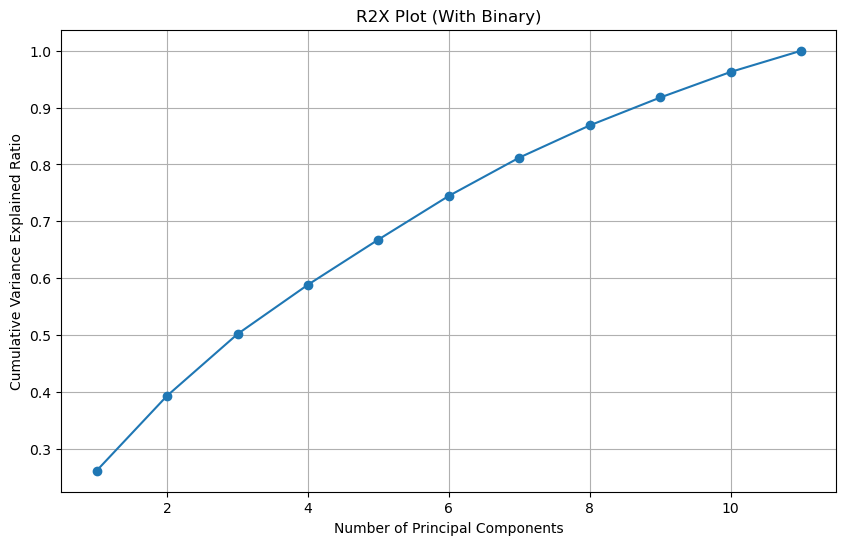

Explained Variance Ratio for each Principal Component:
PC1: 0.2611
PC2: 0.1318
PC3: 0.1086
PC4: 0.0868
PC5: 0.0795
PC6: 0.0768
PC7: 0.0673
PC8: 0.0567
PC9: 0.0490
PC10: 0.0450
PC11: 0.0373


In [199]:
# R^2X plot (Gives us Cumulative Explained Variance vs # PCs)

#Take out last column as it is the target variable
X = data.drop(columns=["Coronary Heart Disease"])  # Assuming "Coronary Heart Disease" is the target variable

#Need to scale data ensuring the equal contribution of each variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform PCA
#Only need to use "fit" function as we don't need to transform data with "fit_transform" when talking about these kinds of graphs
pca = PCA()
X_pca = pca.fit(X_scaled)

#Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.title('R2X Plot (With Binary)')
plt.grid(True)
plt.show()

#Print the explained variance ratio for each principal component
print("Explained Variance Ratio for each Principal Component:")
for i, explained_variance_ratio in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {explained_variance_ratio:.4f}")


## R2X as a Bar Graph (for easier visualization purposes):

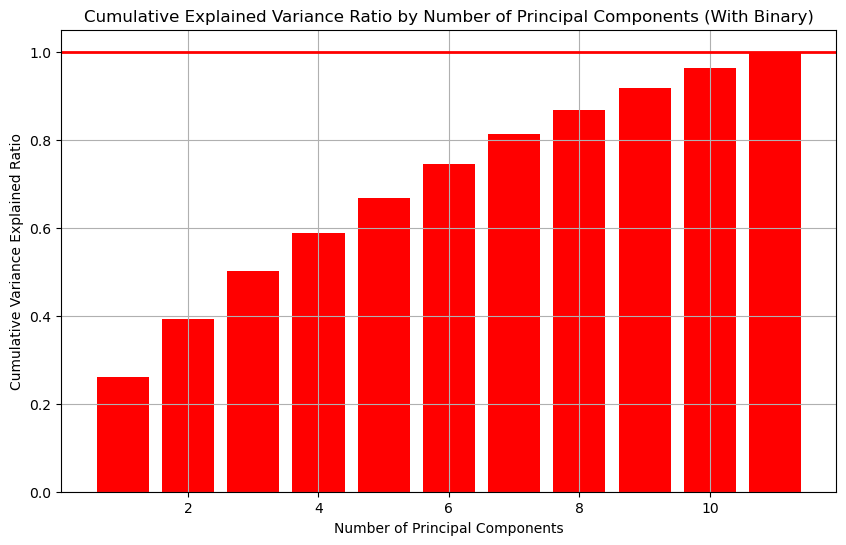

In [201]:
#R^2X plot as bar graph
#Bar graph makes it easier to visualize

#Cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

#Graph
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, color='r')
plt.axhline(y=1, color='r', linestyle='-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components (With Binary)')
plt.grid(True)
plt.show()


## Scree Plot as Bar Graph for easier Visualization
## (Literally a graph of % Var Explained vs PC#):

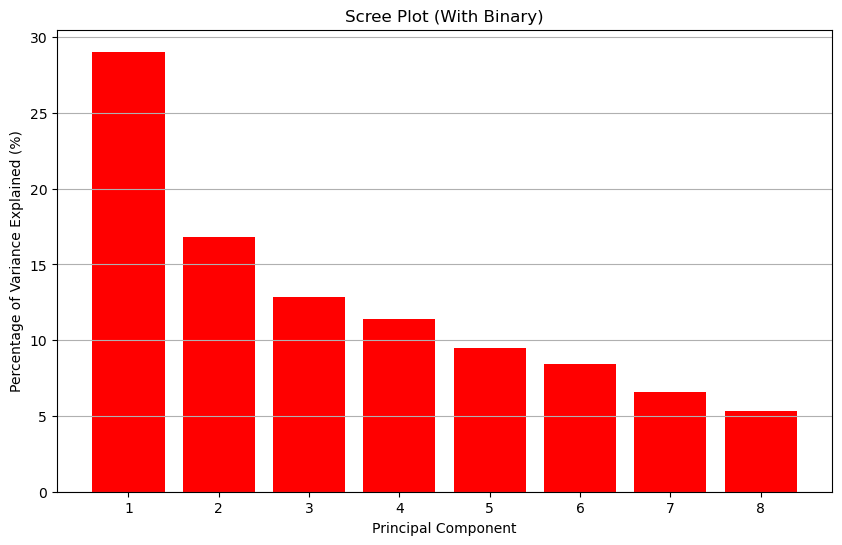

In [221]:
#Scree Plot as bar graph 
#this graphs percent variance explained of each PC

#proportion of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

#Convert to percentages
explained_variance_percentage = explained_variance_ratio * 100

#Graph
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_percentage) + 1), explained_variance_percentage, align='center', color = 'r')
plt.title('Scree Plot (With Binary)')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained (%)')
plt.xticks(range(1, len(explained_variance_percentage) + 1))
plt.grid(axis='y')
plt.show()

## Scores and Loadings Plots:

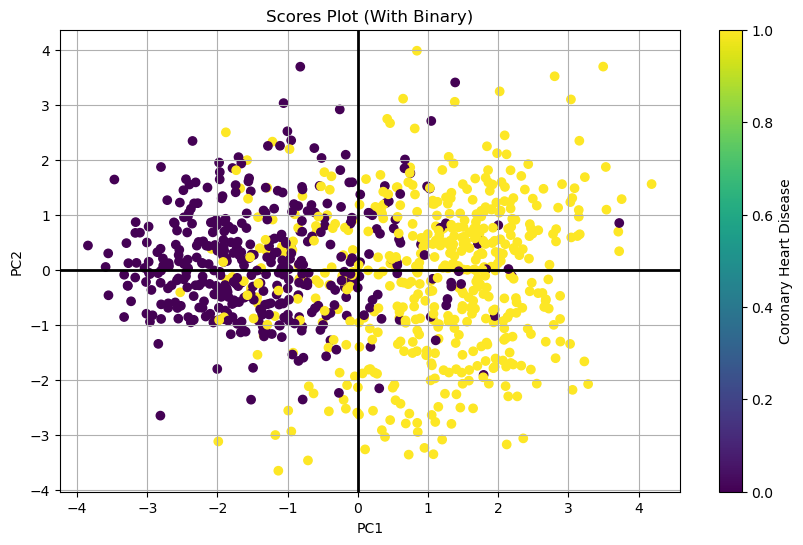

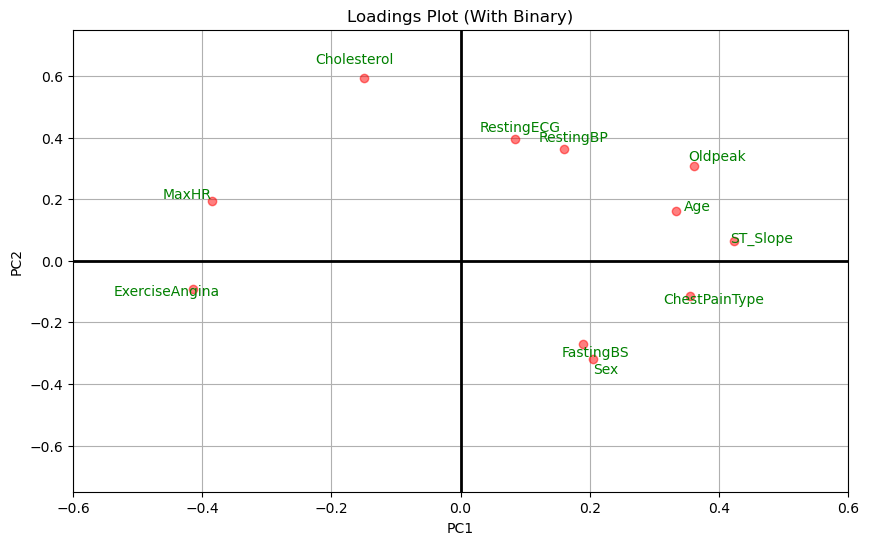

In [223]:
#Perform PCA
#need to use "fit_tranform" now not just "fit" as that is important for the scores and loadings plots:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Scores plot
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["Coronary Heart Disease"], cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (With Binary)')

plt.colorbar(label='Coronary Heart Disease')

plt.axhline(0, color='black', linewidth=2)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=2)  # Add vertical line at x=0
plt.grid(True)

plt.show()

#Loadings plot
plt.figure(figsize=(10, 6))

for i, feature in enumerate(X.columns):
    plt.plot(pca.components_[0, i], pca.components_[1, i], 'o', color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, feature, color='g', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loadings Plot (With Binary)')

plt.axhline(0, color='black', linewidth=2) 
plt.axvline(0, color='black', linewidth=2) 
plt.xlim(-0.6,0.6)
plt.ylim(-0.75,0.75)
plt.grid(True)

plt.show()


## DELETE

In [205]:
##DONT NEED

#To find the most important variable for PC1,
#you would look for the variable with the highest 
#loading (either positive or negative) on PC1. 
#A higher loading value indicates that the variable
#contributes more to the direction of PC1.

# __________________________________________

# Now, Taking PCA on Partial Data Set
# (Excluding Binaries):
# __________________________________________

## Data Cell:

In [112]:
partdata = pd.read_excel("CHD Data Set Excel WO Binary.xlsx")

## R2X Line Graph With Printed Individual Contribution of Explained Variance from each PC:

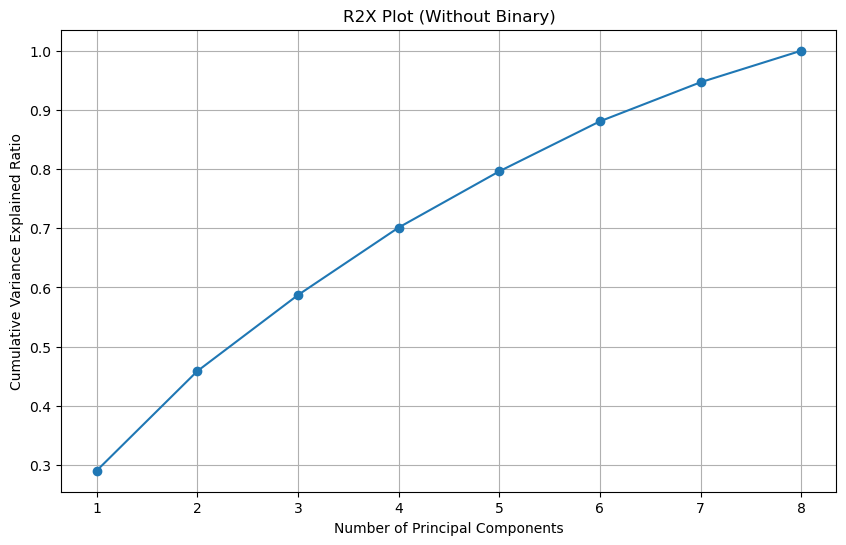

Explained Variance Ratio for each Principal Component:
PC1: 0.2903
PC2: 0.1682
PC3: 0.1286
PC4: 0.1140
PC5: 0.0950
PC6: 0.0845
PC7: 0.0660
PC8: 0.0533


In [226]:
# R^2X plot (Gives us Cumulative Explained Variance vs # PCs)

#Take out last column as it is the target variable
partX = partdata.drop(columns=["Coronary Heart Disease"])  # Assuming "Coronary Heart Disease" is the target variable

#Scale Values
scaler = StandardScaler()
partX_scaled = scaler.fit_transform(partX)

#Perform PCA
pca = PCA()
partX_pca = pca.fit(partX_scaled)

#Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.title('R2X Plot (Without Binary)')
plt.grid(True)
plt.show()

#Print the explained variance ratio for each principal component
print("Explained Variance Ratio for each Principal Component:")
for i, explained_variance_ratio in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {explained_variance_ratio:.4f}")


## R2X as a Bar Graph (for easier visualization purposes):

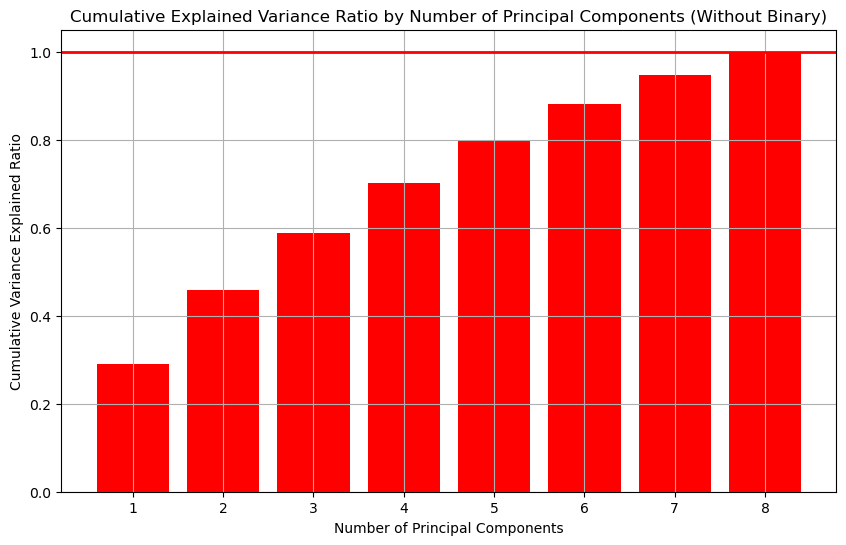

In [227]:
#R^2X plot as bar graph
#Bar graph makes it easier to visualize

#Cumulative explained variance ratio
new_cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

#Graph
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(new_cumulative_explained_variance_ratio) + 1), new_cumulative_explained_variance_ratio, color='r')
plt.axhline(y=1, color='r', linestyle='-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components (Without Binary)')
plt.grid(True)
plt.show()


## Scree Plot as Bar Graph for easier Visualization
## (Literally a graph of % Var Explained vs PC#):

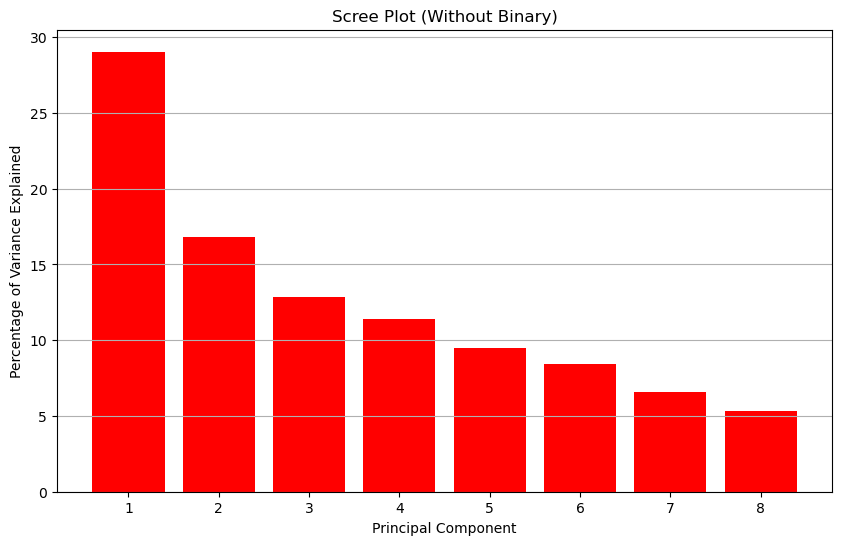

In [228]:
#Scree Plot as bar graph 
#this graphs percent variance explained of each PC

#proportion of variance explained by each principal component
new_explained_variance_ratio = pca.explained_variance_ratio_

#Convert to percentages
new_explained_variance_percentage = new_explained_variance_ratio * 100

#Graph
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(new_explained_variance_percentage) + 1), new_explained_variance_percentage, align='center', color='r')
plt.title('Scree Plot (Without Binary)')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.xticks(range(1, len(new_explained_variance_percentage) + 1))
plt.grid(axis='y')
plt.show()

## Scores and Loadings Plots:

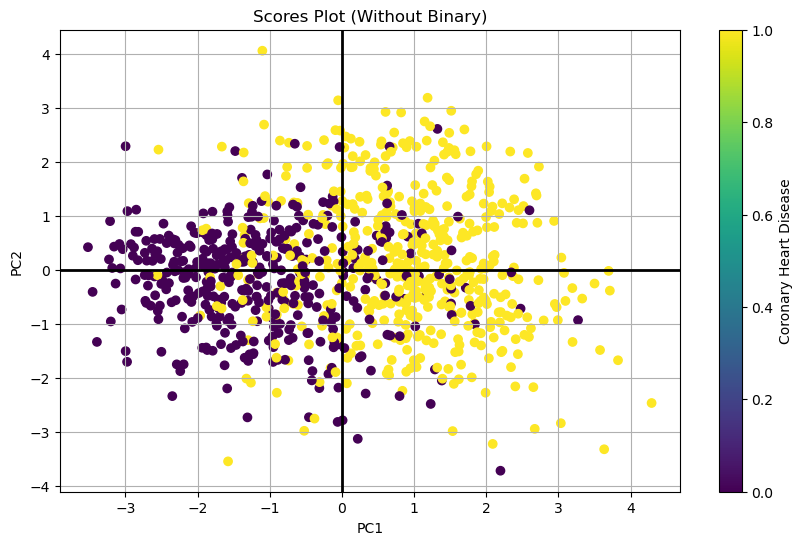

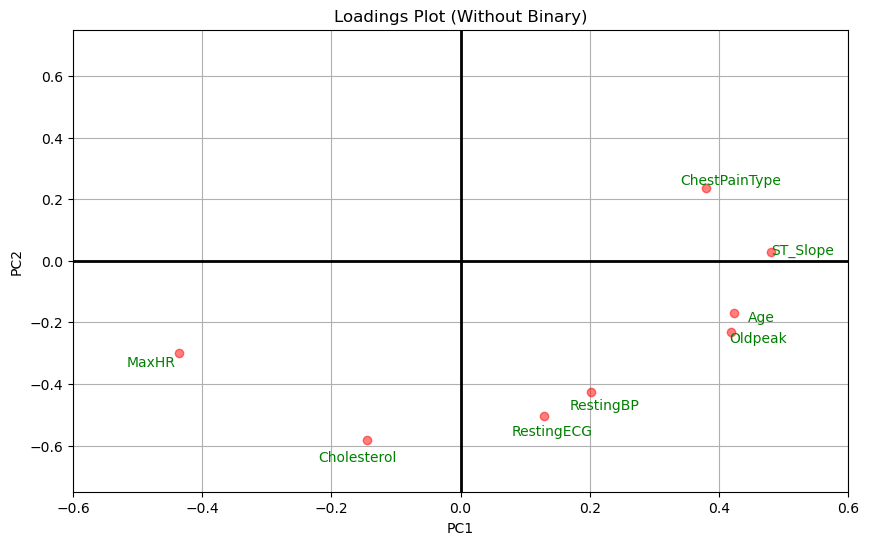

In [229]:
#Perform PCA
#need to use "fit_tranform" now not just "fit" as that is important for the scores and loadings plots:
pca = PCA()
partX_pca = pca.fit_transform(scaled_partdata)

#Scores plot
plt.figure(figsize=(10, 6))

plt.scatter(partX_pca[:, 0], partX_pca[:, 1], c=partdata["Coronary Heart Disease"], cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Without Binary)')

plt.colorbar(label='Coronary Heart Disease')

plt.axhline(0, color='black', linewidth=2)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=2)  # Add vertical line at x=0
plt.grid(True)

plt.show()

#Loadings plot
plt.figure(figsize=(10, 6))

for i, feature in enumerate(partX.columns):
    plt.plot(pca.components_[0, i], pca.components_[1, i], 'o', color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, feature, color='g', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loadings Plot (Without Binary)')

plt.axhline(0, color='black', linewidth=2)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=2)  # Add vertical line at x=0
plt.xlim(-0.6,0.6)
plt.ylim(-0.75,0.75)
plt.grid(True)

plt.show()


## Scores and Loadings Plots but with Reflection Over PC1 For Consistent Interpretation of the Graph Since Negative and Positive is subjective in PCA:


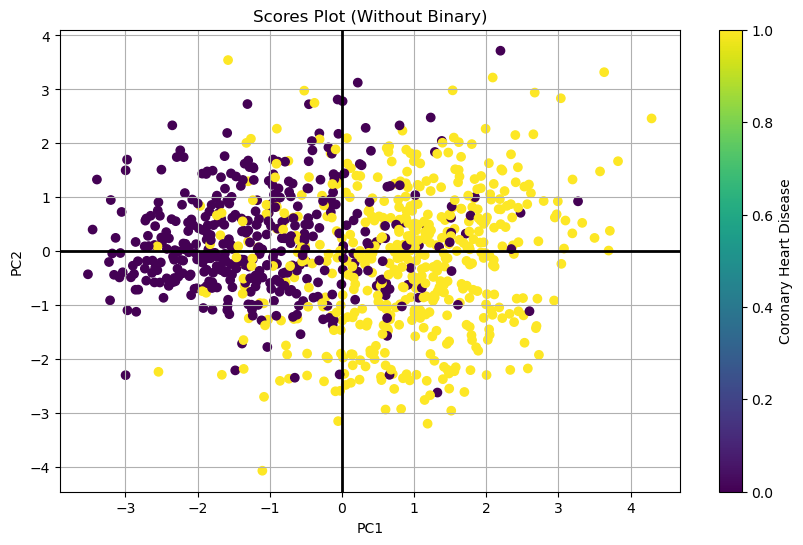

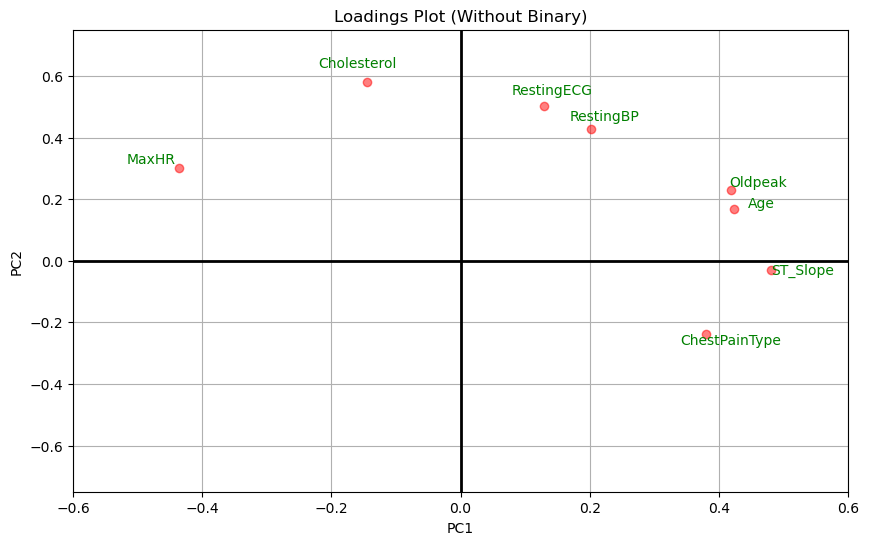

In [230]:
#Plots Flipped over PC1 axis

#Scores plot
plt.figure(figsize=(10, 6))

plt.scatter(partX_pca[:, 0], -partX_pca[:, 1], c=partdata["Coronary Heart Disease"], cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Without Binary)')

plt.colorbar(label='Coronary Heart Disease')

plt.axhline(0, color='black', linewidth=2)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=2)  # Add vertical line at x=0
plt.grid(True)

plt.show()

#Loadings plot
plt.figure(figsize=(10, 6))

for i, feature in enumerate(partX.columns):
    plt.plot(pca.components_[0, i], -pca.components_[1, i], 'o', color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.1, -pca.components_[1, i]*1.1, feature, color='g', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loadings Plot (Without Binary)')

plt.axhline(0, color='black', linewidth=2)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=2)  # Add vertical line at x=0
plt.xlim(-0.6,0.6)
plt.ylim(-0.75,0.75)
plt.grid(True)

plt.show()